In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import style
from matplotlib.gridspec import GridSpec
import seaborn as sns

In [50]:
df=pd.read_csv('C:/Users/HP/Documents/RuangGuru/Python_training/churn rate/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
def data_inv(df):
    print ('number of rows: ',df.shape[0])
    print('dataset variables: ',df.shape[1])
    print('-'*10)
    print('dataset columns: \n')
    print(df.columns)
    print('-'*10)
    print('data-types each columns: \n')
    print(df.dtypes)
    print('-'*10)
    print('missing row in each columns: \n')
    c=df.isnull().sum()
    print(c[c>0])
data_inv(df)

number of rows:  10000
dataset variables:  14
----------
dataset columns: 

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')
----------
data-types each columns: 

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object
----------
missing row in each columns: 

Series([], dtype: int64)


In [3]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [51]:
df=df.drop(['RowNumber','CustomerId','Surname'],axis=1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [52]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [53]:
df_new=df.copy()
def num_replacer(num):
    if num==0:
        num='No'
        return num
    elif num==1:
            num='Yes'
            return num
    else:
        print('undefined')
        return 0

df_new['HasCrCard']=df_new['HasCrCard'].apply(num_replacer)
df_new['IsActiveMember']=df_new['IsActiveMember'].apply(num_replacer)
df_new['Exited']=df_new['Exited'].apply(num_replacer)



In [54]:
df_new.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,Yes,Yes,101348.88,Yes
1,608,Spain,Female,41,1,83807.86,1,No,Yes,112542.58,No
2,502,France,Female,42,8,159660.80,3,Yes,No,113931.57,Yes
3,699,France,Female,39,1,0.00,2,No,No,93826.63,No
4,850,Spain,Female,43,2,125510.82,1,Yes,Yes,79084.10,No


In [16]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


> We gonna check exited and retained customer ratio first


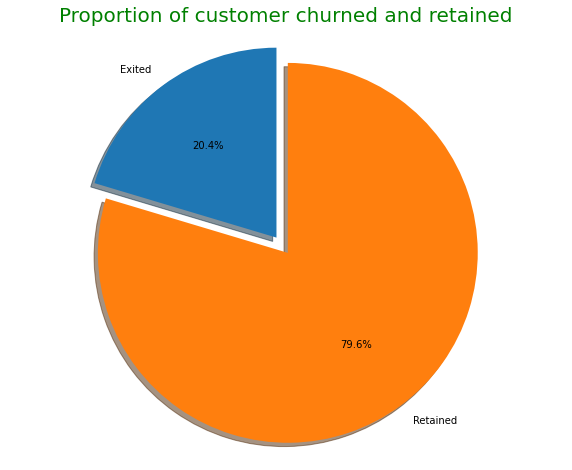

In [55]:
labels = 'Exited', 'Retained'

sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
fig1.set(facecolor = "white")
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20,color='green')
plt.show()

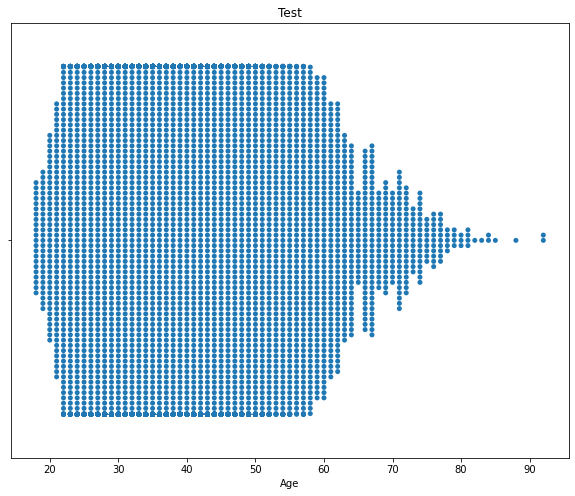

In [79]:
plt.figure(figsize=(10,8))
sns.swarmplot(x='Age',hue='Exited',data=df)
plt.title('Test')
plt.show()

In [56]:
numerical_features=df_new.select_dtypes(include='number').columns.tolist()
categorical_features=df_new.select_dtypes(include='object').columns.tolist()

# numerical_features=numerical_features.drop(['HasCrCard,IsActiveMember'])
print('Numerical Features :')
print(numerical_features,'\n')
print('Categorical Features :')
print(categorical_features)

Numerical Features :
['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary'] 

Categorical Features :
['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Exited']


In [57]:
df_new.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.001384
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.007201
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.007784
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,0.012797
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.014204
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,1.000000


In [58]:
df_new[numerical_features].skew()

CreditScore       -0.071607
Age                1.011320
Tenure             0.010991
Balance           -0.141109
NumOfProducts      0.745568
EstimatedSalary    0.002085
dtype: float64

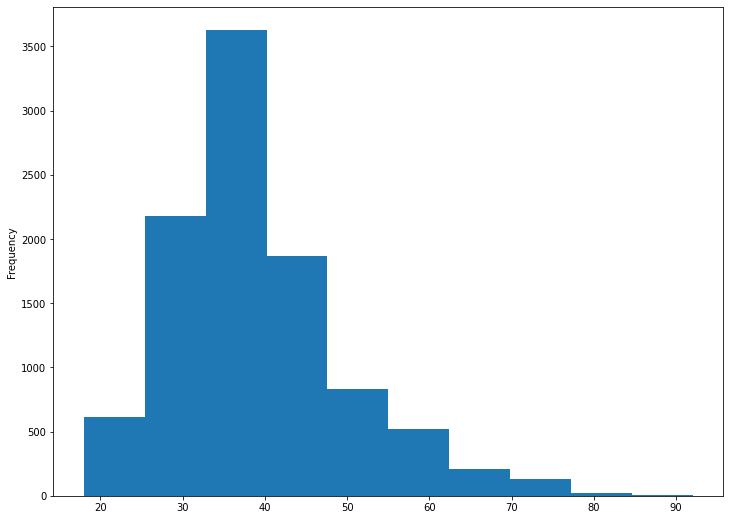

In [59]:
df_new['Age'].plot(kind="hist",figsize=(12, 9))
plt.grid(False)
plt.show()

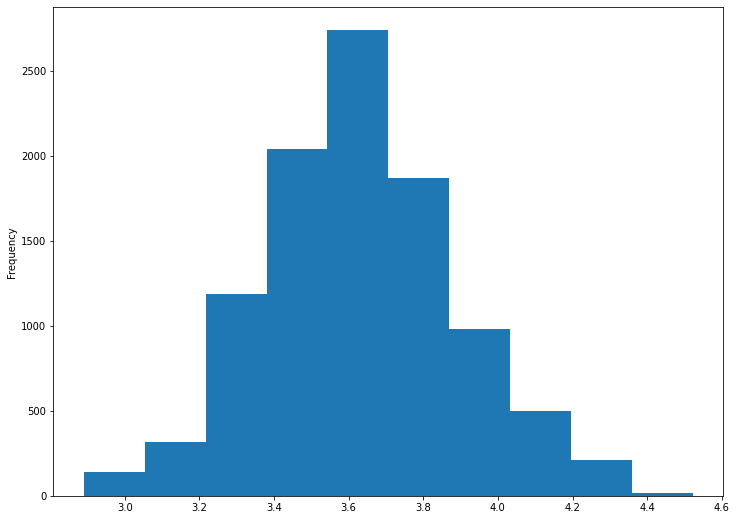

In [60]:
df_new.Age=np.log(df_new['Age'])
df_new['Age'].plot(kind="hist",figsize=(12, 9))
plt.grid(False)
plt.show()

exploring categorical features


In [32]:
for i in categorical_features:
    print(df_new[i].value_counts())

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
Male      5457
Female    4543
Name: Gender, dtype: int64
Yes    7055
No     2945
Name: HasCrCard, dtype: int64
Yes    5151
No     4849
Name: IsActiveMember, dtype: int64
No     7963
Yes    2037
Name: Exited, dtype: int64


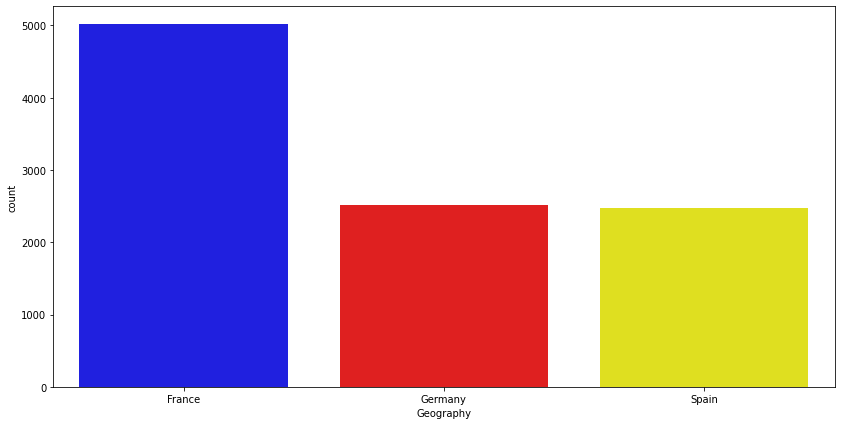

In [35]:
geo_order=df.Geography.value_counts().index

plt.figure(figsize=(14, 7))

sns.countplot(
    x="Geography",
    data=df_new,
    order=geo_order,
    palette=["blue"] + ["red"] + ["yellow"] + (len(geo_order)-1)*["grey"]
)
plt.grid(False)
plt.show()

In [63]:
X = df_new.drop(columns=["Exited"]).copy()
y = df_new["Exited"].copy()

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_rest, y_train, y_rest = train_test_split(X, y, test_size=.1, stratify=y, random_state=11)
X_dev, X_test, y_dev, y_test = train_test_split(X_rest, y_rest, test_size=.5, stratify=y_rest, random_state=11)

print("training size:", X_train.shape[0])
print("dev size:", X_dev.shape[0])
print("test size:", X_test.shape[0])

training size: 9000
dev size: 500
test size: 500


In [65]:
from pprint import pprint
nominal_features = ["Geography", "Gender"]
ordinal_features = X.select_dtypes(
    include="object"
).drop(columns=nominal_features).columns.tolist()

print("nominal features:", nominal_features)
print("ordinal features:")
pprint (ordinal_features, compact=True)

nominal features: ['Geography', 'Gender']
ordinal features:
['HasCrCard', 'IsActiveMember']


In [66]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder

onehot = OneHotEncoder()
onehot.fit(X_train[nominal_features])
X_train_onehot = pd.DataFrame(
    onehot.transform(X_train[nominal_features]).toarray(),
    columns=onehot.get_feature_names_out()
)
X_dev_onehot = pd.DataFrame(
    onehot.transform(X_dev[nominal_features]).toarray(),
    columns=onehot.get_feature_names_out()
)
X_test_onehot = pd.DataFrame(
    onehot.transform(X_test[nominal_features]).toarray(),
    columns=onehot.get_feature_names_out()
)
print("one-hot matrix:")
print(X_train_onehot)

ordinal = OrdinalEncoder()
ordinal.fit(X_train[ordinal_features])
X_train_ordinal = pd.DataFrame(
    ordinal.transform(X_train[ordinal_features]),
    columns=ordinal.feature_names_in_
)
X_dev_ordinal = pd.DataFrame(
    ordinal.transform(X_dev[ordinal_features]),
    columns=ordinal.feature_names_in_
)
X_test_ordinal = pd.DataFrame(
    ordinal.transform(X_test[ordinal_features]),
    columns=ordinal.feature_names_in_
)
print("ordinal matrix:")
print(X_train_ordinal)

one-hot matrix:
      Geography_France  Geography_Germany  Geography_Spain  Gender_Female  \
0                  0.0                1.0              0.0            1.0   
1                  0.0                0.0              1.0            0.0   
2                  1.0                0.0              0.0            0.0   
3                  1.0                0.0              0.0            1.0   
4                  1.0                0.0              0.0            0.0   
...                ...                ...              ...            ...   
8995               1.0                0.0              0.0            0.0   
8996               1.0                0.0              0.0            0.0   
8997               0.0                0.0              1.0            0.0   
8998               0.0                0.0              1.0            1.0   
8999               0.0                0.0              1.0            1.0   

      Gender_Male  
0             0.0  
1             1.0  

In [67]:
X_train_combined = pd.concat(
    [X_train[numerical_features].reset_index(drop=True), X_train_onehot, X_train_ordinal],
    axis=1
)
X_dev_combined = pd.concat(
    [X_dev[numerical_features].reset_index(drop=True), X_dev_onehot, X_dev_ordinal],
    axis=1
)
X_test_combined = pd.concat(
    [X_test[numerical_features].reset_index(drop=True), X_test_onehot, X_test_ordinal],
    axis=1
)

X_train_combined.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,HasCrCard,IsActiveMember
0,673,3.713572,9,98612.10,1,151349.35,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,641,3.688879,5,102145.13,1,100637.07,0.0,0.0,1.0,0.0,1.0,1.0,1.0
2,739,3.713572,5,0.00,2,143882.25,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,614,3.526361,5,0.00,2,185561.89,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,704,3.663562,5,0.00,1,6416.92,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [68]:
from IPython.display import display
scaler = StandardScaler()
scaler.fit(X_train_combined)

X_train_scaled = pd.DataFrame(
    scaler.transform(X_train_combined),
    columns=X_train_combined.columns
)
X_dev_scaled = pd.DataFrame(
    scaler.transform(X_dev_combined),
    columns=X_dev_combined.columns
)
X_test_scaled = pd.DataFrame(
    scaler.transform(X_test_combined),
    columns=X_test_combined.columns
)

with pd.option_context("display.max_columns", None):
    display(X_train_scaled.head())

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,HasCrCard,IsActiveMember
0,0.231108,0.335556,1.374951,0.355872,-0.911964,0.888637,-1.000889,1.728977,-0.575640,1.094932,-1.094932,0.643070,-1.030464
1,-0.100773,0.239986,-0.006138,0.412548,-0.911964,0.007383,-1.000889,-0.578377,1.737198,-0.913299,0.913299,0.643070,0.970437
2,0.915613,0.335556,-0.006138,-1.226064,0.818518,0.758877,0.999112,-0.578377,-0.575640,-0.913299,0.913299,-1.555042,-1.030464
3,-0.380798,-0.389021,-0.006138,-1.226064,0.818518,1.483166,0.999112,-0.578377,-0.575640,1.094932,-1.094932,0.643070,-1.030464
4,0.552618,0.141997,-0.006138,-1.226064,-0.911964,-1.629929,0.999112,-0.578377,-0.575640,-0.913299,0.913299,0.643070,-1.030464


In [69]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, \
                            classification_report

model_default = DecisionTreeClassifier(random_state=42)
model_default.fit(X_train_scaled, y_train)

preds_train = model_default.predict(X_train_scaled)
preds_dev = model_default.predict(X_dev_scaled)
preds_test = model_default.predict(X_test_scaled)

In [70]:
print("train prediction samples:\n", preds_train[:10])
print("train target samples:\n", y_train[:10].tolist())
print("test prediction samples:\n", preds_test[:10])
print("test target samples:\n", y_test[:10].tolist())

train prediction samples:
 ['No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No']
train target samples:
 ['No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No']
test prediction samples:
 ['Yes' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'No']
test target samples:
 ['No', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No']


              precision    recall  f1-score   support

          No       1.00      1.00      1.00      7167
         Yes       1.00      1.00      1.00      1833

    accuracy                           1.00      9000
   macro avg       1.00      1.00      1.00      9000
weighted avg       1.00      1.00      1.00      9000



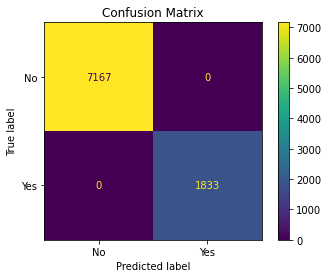

In [71]:
print(classification_report(y_train, preds_train))

ConfusionMatrixDisplay.from_predictions(y_train, preds_train)
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

              precision    recall  f1-score   support

          No       0.87      0.84      0.86       398
         Yes       0.46      0.53      0.49       102

    accuracy                           0.78       500
   macro avg       0.67      0.68      0.67       500
weighted avg       0.79      0.78      0.78       500



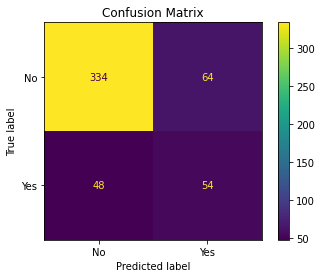

In [72]:
print(classification_report(y_dev, preds_dev))

ConfusionMatrixDisplay.from_predictions(y_dev, preds_dev)
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

              precision    recall  f1-score   support

          No       0.88      0.86      0.87       398
         Yes       0.49      0.52      0.50       102

    accuracy                           0.79       500
   macro avg       0.68      0.69      0.69       500
weighted avg       0.80      0.79      0.79       500



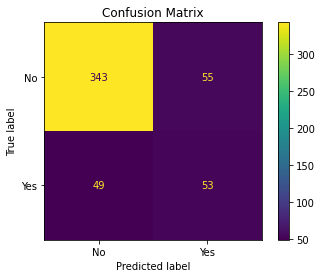

In [73]:
print(classification_report(y_test, preds_test))

ConfusionMatrixDisplay.from_predictions(y_test, preds_test)
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

In [48]:
# from sklearn import svm
# model_default1 = svm.SVC(kernel='linear',random_state=11)
# model_default1.fit(X_train_scaled, y_train)

# preds_train1 = model_default1.predict(X_train_scaled)
# preds_dev1 = model_default1.predict(X_dev_scaled)
# preds_test1 = model_default1.predict(X_test_scaled)

In [74]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,3.737670,2,0.00,1,Yes,Yes,101348.88
1,608,Spain,Female,3.713572,1,83807.86,1,No,Yes,112542.58
2,502,France,Female,3.737670,8,159660.80,3,Yes,No,113931.57
3,699,France,Female,3.663562,1,0.00,2,No,No,93826.63
4,850,Spain,Female,3.761200,2,125510.82,1,Yes,Yes,79084.10


In [75]:
ordinal.feature_names_in_.tolist()

['HasCrCard', 'IsActiveMember']

In [76]:
numerical_features + onehot.get_feature_names_out().tolist() + ordinal.feature_names_in_.tolist()

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'EstimatedSalary',
 'Geography_France',
 'Geography_Germany',
 'Geography_Spain',
 'Gender_Female',
 'Gender_Male',
 'HasCrCard',
 'IsActiveMember']

In [77]:
column_names = (
    numerical_features
    + onehot.get_feature_names_out().tolist()
    + ordinal.feature_names_in_.tolist()
)
X_processed = pd.concat(
    [
     # numerical features
     X[numerical_features].reset_index(drop=True),
     # one-hot encoded features
     pd.DataFrame(
         onehot.transform(X[nominal_features]).toarray(),
         columns=onehot.get_feature_names_out().tolist()
     ),
     # ordinal encoded features
     pd.DataFrame(
         ordinal.transform(X[ordinal_features]),
         columns=ordinal.feature_names_in_.tolist()
     ),
    ],
    axis=1
)
X_processed_scaled = pd.DataFrame(
    scaler.transform(X_processed),
    columns=X_processed.columns
)

print("Predicting all {} data..".format(X_processed_scaled.shape[0]))
preds_full = model_default.predict(X_processed_scaled)

print("Combine the prediction back to the original data..")
X['prediction']=preds_full


# X.Age=np.exp(X.Age)

print("Overview of the resulting data..")
with pd.option_context("display.max_columns", None):
    display(X.head())

print("Export to CSV..")
X.to_csv("prediction.csv", index=False)

print("Done!")

Predicting all 10000 data..
Combine the prediction back to the original data..
Overview of the resulting data..


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,prediction
0,619,France,Female,42.0,2,0.00,1,Yes,Yes,101348.88,Yes
1,608,Spain,Female,41.0,1,83807.86,1,No,Yes,112542.58,No
2,502,France,Female,42.0,8,159660.80,3,Yes,No,113931.57,Yes
3,699,France,Female,39.0,1,0.00,2,No,No,93826.63,No
4,850,Spain,Female,43.0,2,125510.82,1,Yes,Yes,79084.10,No


Export to CSV..
Done!
